## Generality

EM algorithm is a soft clustering algorithm and is used for maximum likelihood.

$$\begin{align}
    p(y_{i}|\Theta) \quad & = & \int d\alpha_{i} \, p(y_{i}|\alpha_{i}) p(\alpha_{i}|\Theta)  \quad \quad (\alpha\, : \, continuous)\\
    p(y_{i}|\Theta) \quad & = & \sum_{\alpha_{i}} p(y_{i}|\alpha_{i}) p(\alpha_{i}|\Theta)  \quad \quad (\alpha \, : \, discrete)
\end{align}$$

In the following, we consider the continuous case and notice the joint probability $p(y_{i}|\alpha_{i}) p(\alpha_{i}|\Theta) = p(y_{i}, \alpha_{i}|\Theta)$.

$$\begin{align}
L \quad & = & \quad \prod_{i=1}^{N} p(y_{i}|\Theta) \qquad = \qquad \prod_{i=1}^{N} \Big[ \int d\alpha_{i} \, p(y_{i}, \alpha_{i}|\Theta)\Big]
\end{align}$$

It is more convenient to consider the log likelihood $log(L)$ to perform the maximum likelihood estimation for $\tilde{\Theta}$.

$$\begin{align}
\tilde{\Theta}\quad & = &  argmax_{\Theta}\quad \sum_{i=1}^{N} log  \, p(y_{i}|\Theta)\\
& = & argmax_{\Theta}\quad \sum_{i=1}^{N} log\Big[ \int d\alpha_{i} \, p(y_{i}, \alpha_{i}|\Theta)\Big]
\end{align}$$

For a convecx function as log, Jensen's theorem holds. By multiplying and dividing the integrand by $q(\alpha_{i})$, we can apply the Jensen's theorem. The following is true for any  $\Theta$.

$$\begin{align}
\sum_{i=1}^{N} log \Big[ \int d\alpha_{i} \, p(y_{i}, \alpha_{i}|\Theta)\Big] \quad
& \ge &  \sum_{i=1}^{N} \int d\alpha_{i} \, q(\alpha_{i})\,log\,\bigg[  \frac{p(y_{i}, \alpha_{i}|\Theta)}{q(\alpha_{i})}\bigg]
\end{align}$$

Define the right hand side as a lower bound function $B(\Theta, \{\alpha\})$. The strategy of the EM algorithm is to iterate two steps of optimizations. At $n$th iteration, suppose we've obtained $\Theta_{n}$ and $\{\alpha\}_{n}$ by $n-1$ th iteration.

E-step:
$$\begin{align}
\{\alpha_{i}\}_{n + 1} \quad & = & argmax_{\{\alpha\}_{n}}\quad B(\Theta_{n}, \{\alpha_{i}\}_{n})
\end{align}$$

M-step:
$$\begin{align}
\Theta_{n + 1}
 \quad & = &  argmax_{\Theta_{n}}\quad B(\Theta_{n}, \{\alpha_{i}\}_{n+1})
\end{align}$$


The lower bound function for the likelihood reads
$$\begin{align}
B(\Theta, \{\alpha_{i}\}) \quad & = &  \sum_{i=1}^{N} \int d\alpha_{i} \, q_{i}(\alpha_{i})\,log\,\bigg[  \frac{p(\alpha_{i}|y_{i}, \Theta)p(y_{i}|\Theta)}{q_{i}(\alpha_{i})}\bigg]\\
& = &  \sum_{i=1}^{N} \int d\alpha_{i} \, q_{i}(\alpha_{i})\,log\,p(y_{i}|\Theta) \quad +\quad  \sum_{i=1}^{N} \int d\alpha_{i} \, q_{i}(\alpha_{i})\,log\,\bigg[  \frac{p(\alpha_{i}|y_{i}, \Theta)}{q_{i}(\alpha_{i})}\bigg]\\
& = &  \sum_{i=1}^{N} log\,p(y_{i}|\Theta) \quad +\quad \sum_{i=1}^{N} \int d\alpha_{i} \, q_{i}(\alpha_{i})\,log\,\bigg[  \frac{p(\alpha_{i}|y_{i}, \Theta)}{q_{i}(\alpha_{i})}\bigg]
\end{align}$$

The first term is $\alpha_{i}$-independent part and the second term is $\alpha_{i}$-dependent, which is called Kullback-Leibler divergence between $p(\alpha_{i}|y_{i}, \Theta)$ and $q(\alpha_{i})$. One can show that the second term is negative or equal to zero. Namely, the maximum value of the second term is zero and it happens only when

$$\begin{align}
p(\alpha_{i, n}|y_{i}, \Theta_{n}) \quad
& = & argmax_{q_{i}(\alpha_{i,n})}\quad \sum_{i=1}^{N} \int d\alpha_{i,n} \, q_{i}(\alpha_{i,n})\,log\,\bigg[  \frac{p(\alpha_{i,n}|y_{i}, \Theta_{n})}{q_{i}(\alpha_{i,n})}\bigg]
\end{align}$$

Namely, once $q(\alpha_{i, n}) = p(\alpha_{i, n}|y_{i}, \Theta_{n})$ is achieved, the second term vainishes. However, notice that $\Theta_{n}$ is not necessarily yet fully optimized to maximize the likelihood. Therefore, the EM algorithm interates the following two steps until the change in the parameters become negligible.
<br>
<br>

E-step: 
$$\begin{align}
\{\alpha_{i}\}_{n + 1} \quad & = & p(\alpha_{i, n}|y_{i}, \Theta_{n})
\end{align}$$
<br>
<br>
M-step:
$$\begin{align}
\Theta_{n + 1}  \quad & = & argmax_{\Theta_{n}}\quad \sum_{i=1}^{N} \int d\alpha_{i, n+1} \, q(\alpha_{i, n+1})\,log\,p(y_{i}, \alpha_{i, n + 1}|\Theta_{n})
\end{align}$$
<br>

For the M-step, we have eliminated $q(\alpha_{i, n+1})logq(\alpha_{i, n+1})$ as it does not depend on $\Theta$. Although it might seem maximize $\sum_{i=1}^{N} log\,p(y_{i}|\Theta)$ would be the right step, the reason why we started the EM algorithm is that it is difficult to directly optimize $log\,p(y_{i}|\Theta)$. By involving the hidden variable and maximize the hidden variable, it becomes easier to find $\Theta_{n + 1}$.


### Gaussian Mixture (finite number of mixture of Gaussians)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [100]:
# this function outputs an covariance matrices avoiding generating too much squashed ellipses
def generate_nice_covariance_for_ellipse(k):
    sg = np.zeros((k, 2, 2))
    for i in range(k):
        eig = 2*np.random.rand(2) + 0.5 # adding 0.2 and normalize to avoid generating smashed ellipses
        ang = np.pi * np.random.rand(1) # in radian
        c, s = np.cos(ang), np.sin(ang)
        rot = np.matrix(np.asarray([[c, s], [-s, c]]))
        pax = np.eye(2) * eig # axes of ellipes
        sgrt = np.dot(rot, pax)
        sg[i] = np.dot(sgrt, sgrt.T)
    return sg

In [101]:
# this function outputs an elliptic contour of a Gaussian based on its mu and sg.
def contour_ellipse(mu, sg):
    theta = np.linspace(0,2*np.pi, 100)
    eg, egv = np.linalg.eig(sg) # eigen values/vectors of the covariant matrices
    elp_orig = np.vstack((eg[0] * np.cos(theta), eg[1] * np.sin(theta))) 
    elp_rot = np.dot(egv, elp_orig) # rotate the ellipse
    elp = mu[:,np.newaxis] + elp_rot # translate the ellipse
    return elp

In [102]:
dim = 2    # dimension of the problem. Suppose we work on a 2D problem.
nm = 3     # number of mixed gaussian. Here, we set it to 3.
ns = 2000  # number of samples

In [106]:
mu = 10 * np.random.rand(nm, dim)             # mean
sg = generate_nice_covariance_for_ellipse(nm)  # this is to ensure the positive-definiteness of the sigma
lm = np.random.rand(nm) + 0.1           # lambda : ratio of the mixture. 0.1 is to make sure it won't generate too tiny weight
lm /= lm.sum()
lm_ind = np.round(np.cumsum(lm) * ns).astype(int)
lm_ind = np.insert(lm_ind, 0, 0)

In [107]:
smp = np.zeros((dim, ns))
for i in range(nm):
    smp[:, lm_ind[i]:lm_ind[i+1]] = np.random.multivariate_normal\
                                    (mu[i], sg[i], lm_ind[i+1] - lm_ind[i]).T

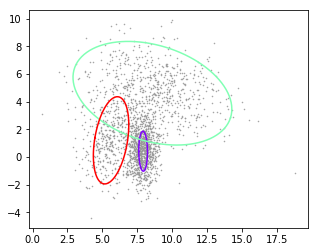

In [113]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.plot(smp[0], smp[1], '.', markersize=1, color=(0.6, 0.6, 0.6)) #

#below is to plot the contours of the randomly generated Gaussians
color = plt.cm.rainbow(np.linspace(0,1,nm))

for i, c in zip(range(nm), color):
    elp = contour_ellipse(mu[i], sg[i])
    plt.plot(elp[0], elp[1], color=c, ls='-')

We have now generated a data set to apply EM algorithm.

In [129]:
mue = 10 * np.random.rand(nm, dim)             # initial mean (to be Estimated)
sge = generate_nice_covariance_for_ellipse(nm) # initial std  (to be Estimated)
lme = np.random.rand(nm)
lme /= lme.sum()                      # initial mixture ratio (to be Estimated)

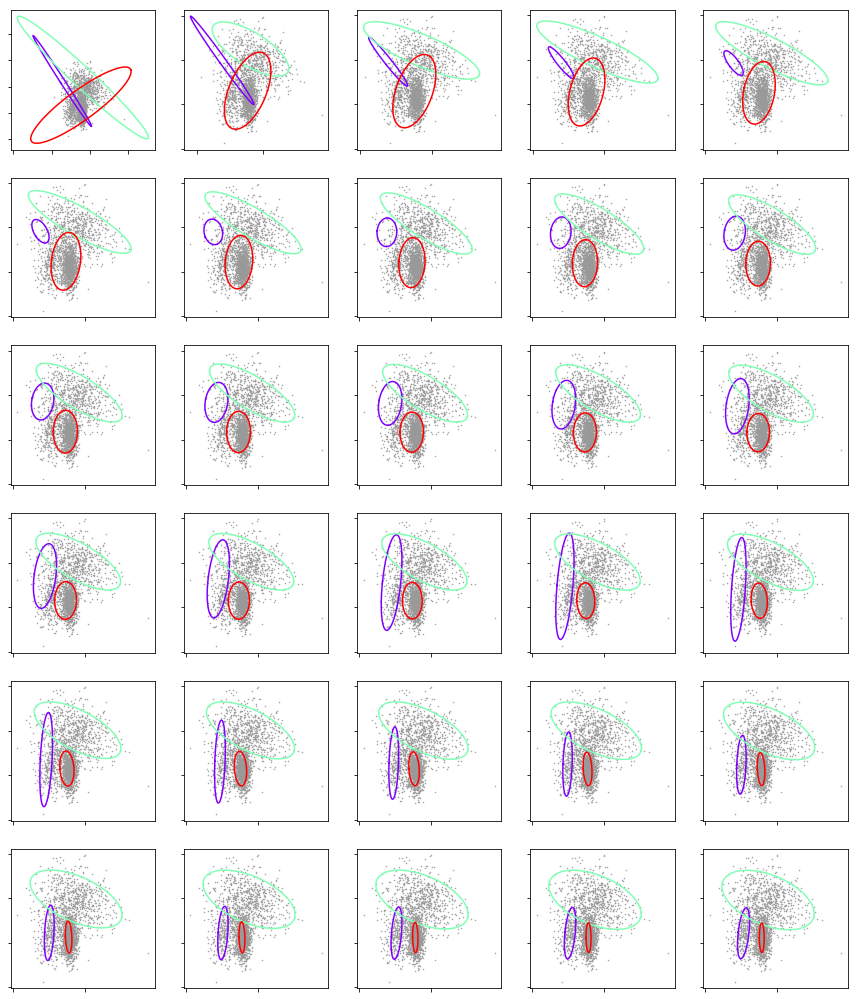

In [130]:
Nrep = 30
plt.rcParams['figure.figsize'] = (15.0, 18.0) # set default size of plots

for rep in range(Nrep):
    gs = np.zeros((nm, ns))
    for i in range(nm):
        gs[i, :] = lme[i] * multivariate_normal(mue[i], sge[i]).pdf(smp.T)
    
    r = gs / gs.sum(axis=0)
    lme = r.sum(axis=1)/r.sum()
    for i in range(nm):
        dlts = smp - mue[i][:, np.newaxis]
        sge[i] = np.dot((r[i] * dlts), dlts.T) / r[i].sum()
        mue[i] = (r[i] * smp).sum(axis=1) / r[i].sum()
    
    ax = plt.subplot(6, 5, rep + 1)
    plt.plot(smp[0], smp[1], '.', color=(0.6, 0.6, 0.6), markersize=1)
    color = plt.cm.rainbow(np.linspace(0, 1, nm))
    for i, c in zip(range(nm), color):
        elp = contour_ellipse(mue[i], sge[i])
        plt.plot(elp[0], elp[1], color=c, ls='-')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
